## Importing All important libraries

In [774]:
# numpy & pandas
import numpy as np
import pandas as pd
from math import sqrt

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Machine learning Libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [775]:
#reading the data
bike = pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [776]:
# Checking the last 5 rows of the dataframe
bike.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [777]:
#Checking the shape of the dataframe 
bike.shape

(730, 16)

## There are total 730 rows and 16 columns in the given dataset

In [778]:
# Checking for duplicates and dropping the entire duplicate row
bike.drop_duplicates(subset=None, inplace=True)

In [779]:
bike.shape

(730, 16)

## There is no duplicate data

In [780]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 97.0+ KB


In [781]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Checking the null values in the rows and columns

In [782]:
# number of empty rows in data
print(bike.isnull().all(axis=1).sum())

0


In [783]:
# number of empty columns in loandata
print(bike.isnull().all(axis=0).sum())

0


## There are no null rows and columns

### There are some columns which are not important for further analysis so we drop them

In [784]:
#dropping the unwanted columns
bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
bike.shape

(730, 12)

## Visualising the data

## Visualising Numeric Variables
Let's make a pairplot of all the numeric variables

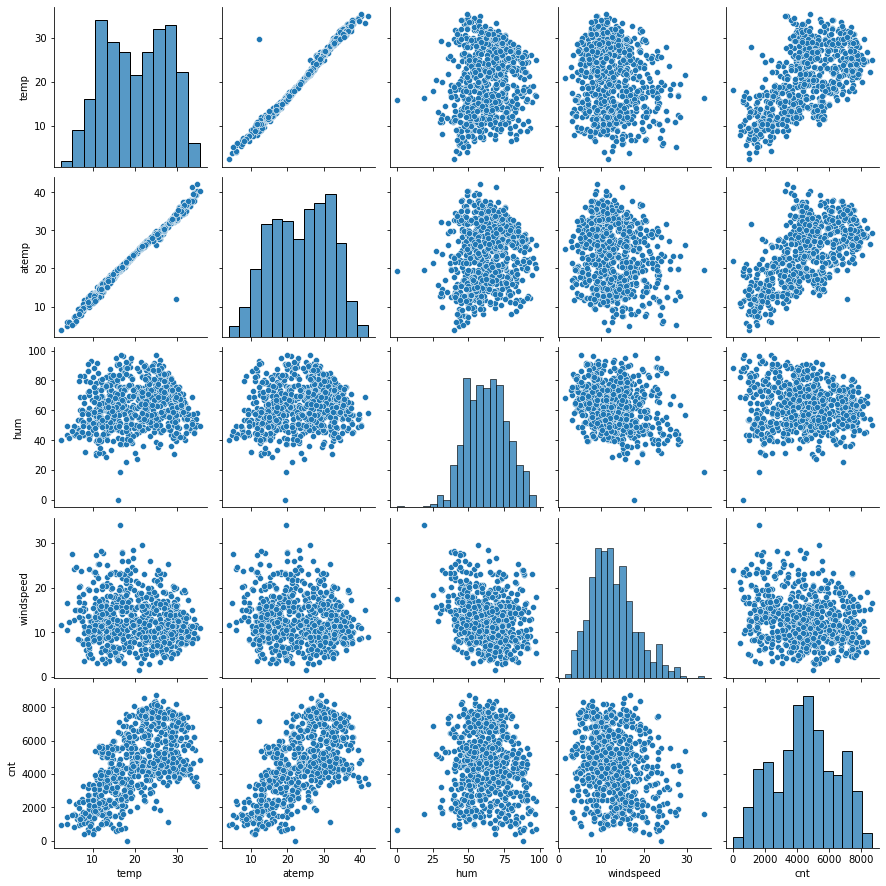

In [785]:
#visualtising numeric variables
bike_n = bike[['temp','atemp','hum','windspeed','cnt']]
sns.pairplot(bike_n)
plt.show()

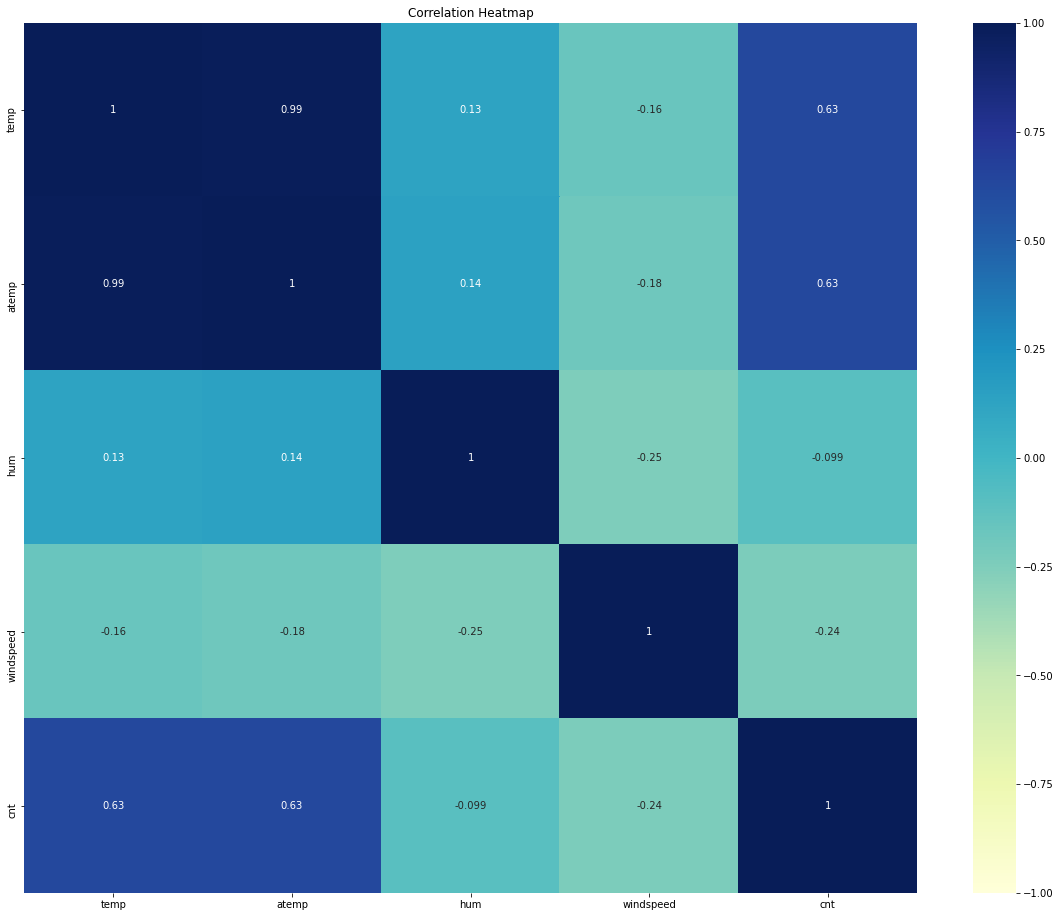

In [786]:
plt.figure(figsize=(20,16))
ax= sns.heatmap(bike_n.corr(), annot = True, cmap="YlGnBu",vmin=-1.0,vmax=1.0)
plt.title("Correlation Heatmap")
plt.show()

#### There is linear relationship between temp and atemp. 
#### so we can use one of them.We will decide which parameters to keep based on VIF and p-value w.r.t other variables

## Visualising Categorical Variables
there are a few categorical variables as well. Let's make a boxplot for some of these variables.

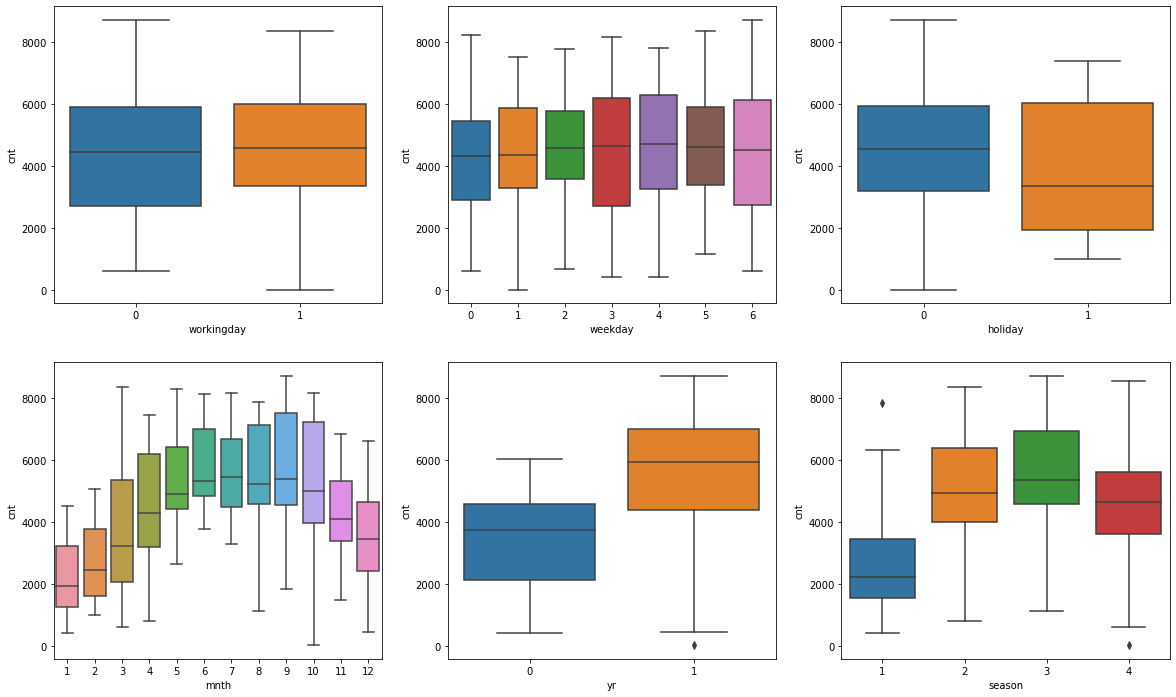

In [787]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.show()

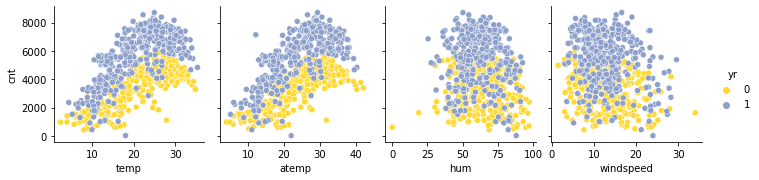

In [788]:
# Checking the impact of year against the numerical variable  
ax = sns.pairplot(x_vars=['temp', 'atemp', 'hum', 'windspeed'], y_vars=['cnt'] , data=bike, hue='yr', palette='Set2_r')
plt.show()

#### All the parameters have increased values in 2019 compared to 2019. Thus, year may become a key paratemeter in the model

## Data preparation
assigning the variables like season, month, weathersit, weekday by names for easy visualisation

In [789]:
#Converting season
bike.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
bike.season.value_counts(normalize=True)

Fall      0.257534
Summer    0.252055
Spring    0.246575
Winter    0.243836
Name: season, dtype: float64

In [790]:
#Converting mnth
bike.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), 
                  inplace=True)
bike.mnth.value_counts(normalize=True)

Aug    0.084932
May    0.084932
Jul    0.084932
Dec    0.084932
Oct    0.084932
Jan    0.084932
Mar    0.084932
Sep    0.082192
Nov    0.082192
Apr    0.082192
Jun    0.082192
Feb    0.076712
Name: mnth, dtype: float64

In [791]:
#Converting weekdays
bike.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
bike.weekday.value_counts(normalize=True)

Sunday       0.143836
Monday       0.143836
Saturday     0.143836
Friday       0.142466
Thursday     0.142466
Tuesday      0.142466
Wednesday    0.141096
Name: weekday, dtype: float64

In [792]:
#Converting weathersit
bike.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
bike.weathersit.value_counts(normalize=True)

Clear             0.634247
Misty             0.336986
Light_rainsnow    0.028767
Name: weathersit, dtype: float64

## Dummy Variables

#### Season

In [793]:
season = pd.get_dummies(bike['season'], drop_first = True)
season.head(5)

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


#### Month

In [794]:
month = pd.get_dummies(bike['mnth'], drop_first = True)
month.head(5)

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


#### Weekday

In [795]:
weekday = pd.get_dummies(bike['weekday'], drop_first = True)
weekday.head(5)

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


#### Weather

In [796]:
weather = pd.get_dummies(bike['weathersit'], drop_first = True)
weather.head(5)

,Light_rainsnow,Misty
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


## Adding created dummies into the data frame

In [797]:
#season, month, weather and weekday is being added
bike_new = pd.concat([bike,season,month,weather,weekday], axis = 1)
bike_new.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,Spring,0,Jan,0,Saturday,0,Misty,14.110847,18.18125,80.5833,...,0,0,0,1,0,1,0,0,0,0
1,Spring,0,Jan,0,Sunday,0,Misty,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,1,0,0,0
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,0,0,0


In [798]:
#checking the shape of new dataframe
bike_new.shape

(730, 34)

In [799]:
#deleting the unnecessry column season, mnth, weathersit and weekday and checking shape
bike_new.drop(['season','mnth','weathersit','weekday'],axis=1,inplace=True)
bike_new.shape

(730, 30)

### now we have the new df having 730 rows and 30 columns
## Splitting the Data into Training and Testing Sets

In [800]:
np.random.seed(0)
bike_train, bike_test = train_test_split(bike_new, train_size = 0.7, random_state = 333)

In [801]:
bike_train.shape

(510, 30)

In [802]:
bike_test.shape

(220, 30)

### After splitting into train and test dataset we have 510 rows in train dataset and 220 in test dataset

## Rescaling the Features
Here we use Min-Max scaling

In [803]:
scaler = MinMaxScaler()

In [804]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','cnt']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [805]:
#Checking after rescalling
bike_train.head(5)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,1,0,0,0,0,1,0,0,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,0,...,0,0,0,0,1,0,0,0,0,0
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,0,0,1,0,0,1,0,0,0
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0.092039,1,0,...,0,0,0,0,0,0,1,0,0,0
502,1,0,1,0.629300,0.619631,0.543723,0.235894,0.876323,0,1,...,0,0,0,0,0,0,0,0,0,0


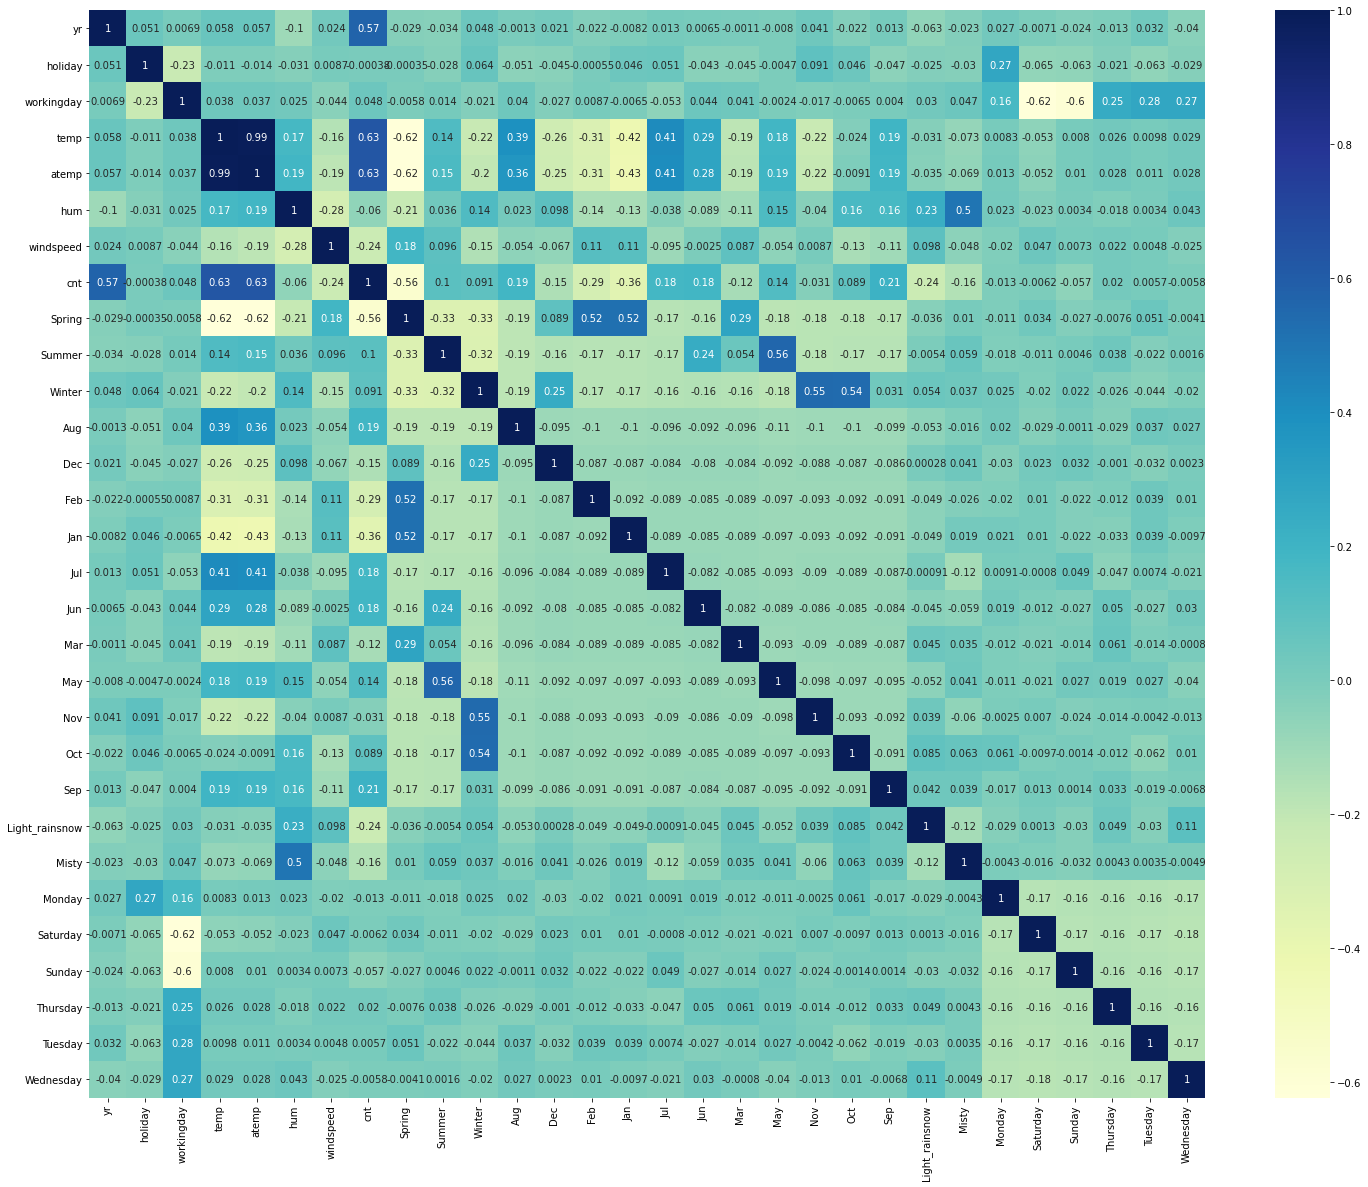

In [806]:
# checking the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (25,20))
sns.heatmap(bike_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### There is multi-colinearity between the variables.
-Spring,Jan,light_rainsnow,mar,windspeed etc are negatively correlated with cnt

-temp and atemp has very high correlation having value 0.99 so we can use only one of these.

-workingday variable has high negative correlation with Sat & Sun

-misty weather and humidity has correlation

-temp, atemp and yr has strong correlation with cnt

-various months and corresponding weather has correlation

## Dividing into X and Y sets for the model building

In [807]:
y_train = bike_train.pop('cnt')
X_train = bike_train

## Building our model
we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

## RFE
Using Recursive feature elimination 

In [808]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [809]:
# Checking which parameters have been selected in that list of 15
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 11),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 8),
 ('Winter', True, 1),
 ('Aug', False, 13),
 ('Dec', True, 1),
 ('Feb', False, 6),
 ('Jan', False, 5),
 ('Jul', True, 1),
 ('Jun', False, 12),
 ('Mar', True, 1),
 ('May', False, 3),
 ('Nov', True, 1),
 ('Oct', False, 10),
 ('Sep', True, 1),
 ('Light_rainsnow', True, 1),
 ('Misty', True, 1),
 ('Monday', False, 4),
 ('Saturday', True, 1),
 ('Sunday', False, 7),
 ('Thursday', False, 14),
 ('Tuesday', False, 9),
 ('Wednesday', False, 15)]

In [810]:
# columns which are selected
col = X_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'Spring', 'Winter', 'Dec',
       'Jul', 'Mar', 'Nov', 'Sep', 'Light_rainsnow', 'Misty', 'Saturday'],
      dtype='object')

In [811]:
# columns which have been eleminated 
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'Summer', 'Aug', 'Feb', 'Jan', 'Jun', 'May',
       'Oct', 'Monday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [812]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

#### Model 1

In [813]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [814]:
#Let's see the summary of our linear model
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     169.3
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.30e-183
Time:                        04:08:21   Log-Likelihood:                 502.37
No. Observations:                 510   AIC:                            -972.7
Df Residuals:                     494   BIC:                            -905.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3599      0.033     10.

### VIF check

In [815]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,353.73
2,atemp,351.21
3,hum,23.02
4,windspeed,5.16
6,Winter,2.76
5,Spring,2.69
13,Misty,2.28
0,yr,2.05
10,Nov,1.83
8,Jul,1.41


### Manual Model Development using statsmodel

#### Model 2

Since temp and atemp both have high VIF but atemp has high p-value so we drop that

In [816]:
X_train_new = X_train_rfe.drop(['atemp'], axis = 1)

In [817]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [818]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     181.4
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.56e-184
Time:                        04:08:34   Log-Likelihood:                 501.85
No. Observations:                 510   AIC:                            -973.7
Df Residuals:                     495   BIC:                            -910.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3623      0.033     10.

In [819]:
X_train_new.columns

Index(['yr', 'temp', 'hum', 'windspeed', 'Spring', 'Winter', 'Dec', 'Jul',
       'Mar', 'Nov', 'Sep', 'Light_rainsnow', 'Misty', 'Saturday'],
      dtype='object')

In [820]:
#Checking VIF for new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,22.60
1,temp,15.85
3,windspeed,5.04
5,Winter,2.73
4,Spring,2.69
12,Misty,2.27
0,yr,2.05
9,Nov,1.82
7,Jul,1.41
6,Dec,1.40


#### Model 3
we have high VIF for hum so we drop it because it is highly corelated with the other variables

In [821]:
X_train_new = X_train_new.drop(['hum'], axis = 1)

#### Rebuilding the model without hum

In [822]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [823]:
#Let's see the summary of our linear model
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     186.8
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.67e-181
Time:                        04:08:51   Log-Likelihood:                 491.90
No. Observations:                 510   AIC:                            -955.8
Df Residuals:                     496   BIC:                            -896.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2678      0.026     10.

In [824]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.14
2,windspeed,5.01
4,Winter,2.35
0,yr,2.04
3,Spring,1.91
8,Nov,1.80
11,Misty,1.53
6,Jul,1.37
5,Dec,1.34
9,Sep,1.22


#### Model 4
now we drop Spring

In [825]:
X_train_new = X_train_new.drop(['Spring'], axis = 1)

In [826]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     174.8
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.35e-169
Time:                        04:09:00   Log-Likelihood:                 460.89
No. Observations:                 510   AIC:                            -895.8
Df Residuals:                     497   BIC:                            -840.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1254      0.020      6.

In [827]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.67
2,windspeed,3.84
3,Winter,2.24
0,yr,2.01
7,Nov,1.80
10,Misty,1.51
5,Jul,1.37
4,Dec,1.30
8,Sep,1.21
11,Saturday,1.17


#### Model 5
Nov having p-value higher than 0.05 so we drop it

In [828]:
X_train_new = X_train_new.drop(['Nov'], axis = 1)

In [829]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          4.52e-170
Time:                        04:09:10   Log-Likelihood:                 459.28
No. Observations:                 510   AIC:                            -894.6
Df Residuals:                     498   BIC:                            -843.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1211      0.020      6.

In [830]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.59
2,windspeed,3.73
0,yr,2.00
9,Misty,1.50
3,Winter,1.40
5,Jul,1.37
7,Sep,1.20
4,Dec,1.18
10,Saturday,1.17
6,Mar,1.14


#### Model 6

In [831]:
X_train_new = X_train_new.drop(['Mar'], axis = 1)

In [832]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     205.8
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          6.10e-170
Time:                        04:09:19   Log-Likelihood:                 456.21
No. Observations:                 510   AIC:                            -890.4
Df Residuals:                     499   BIC:                            -843.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1321      0.019      6.

In [833]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.57
2,windspeed,3.59
0,yr,1.99
8,Misty,1.49
3,Winter,1.38
5,Jul,1.37
6,Sep,1.19
4,Dec,1.17
9,Saturday,1.17
7,Light_rainsnow,1.06


#### Model 7

In [834]:
X_train_new = X_train_new.drop(['Dec'], axis = 1)

In [835]:
# Add a constant
X_train_lm7 = sm.add_constant(X_train_new)

# Create a fitted model
lr7 = sm.OLS(y_train, X_train_lm7).fit()

# Print a summary of the linear regression model obtained
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     225.9
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          6.84e-170
Time:                        04:09:29   Log-Likelihood:                 453.28
No. Observations:                 510   AIC:                            -886.6
Df Residuals:                     500   BIC:                            -844.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1224      0.019      6.

In [836]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.54
2,windspeed,3.57
0,yr,1.99
7,Misty,1.48
4,Jul,1.37
3,Winter,1.27
5,Sep,1.19
8,Saturday,1.17
6,Light_rainsnow,1.06


In [837]:
# Checking the parameters obtained
lr7.params

const             0.122359
yr                0.228808
temp              0.616495
windspeed        -0.151324
Winter            0.100906
Jul              -0.065035
Sep               0.060739
Light_rainsnow   -0.294066
Misty            -0.069305
Saturday          0.022719
dtype: float64

#### This model looks good, as there seems to be very low multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model

## Final Model Interpretation

### Hypothesis Testing 
Hypothesis testing states that

H0:B1=B2=...=Bn=0
    
H1: at least one Bi!=0

#### From the lr7 model summary, it is evident that all our coefficients are not equal to zero, which means we reject the null hypothesis

### F-Staitsics 
F-Statistics is used for testing the overall significance of the Model. The higher the F-Statistics, the more significant the Model is.

we have

F-statistic: 225.9

Prob (F-statistic): 6.84e-170

So the overall model is significant.

### Validating the assumption of Linear Regression Model
-Normality of Errors

-Linear Relationship

-Homoscedasticity

-Absence of Multicollinearity

#### Residual Analysis of the train data
checking if the error terms are also normally distributed

In [838]:
y_train_cnt = lr7.predict(X_train_lm7)

Text(0.5, 0, 'Errors')

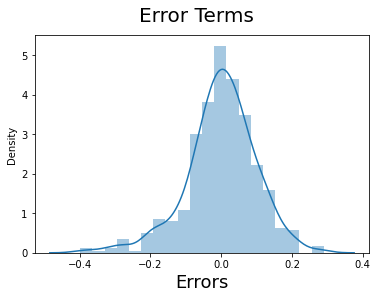

In [839]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)      


we can see that error terms are following a normal distribution

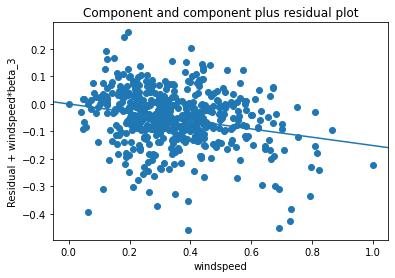

In [840]:
sm.graphics.plot_ccpr(lr7, 'windspeed')
plt.show()

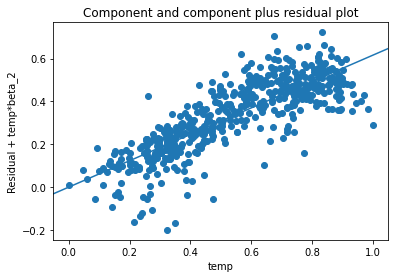

In [841]:
sm.graphics.plot_ccpr(lr7, 'temp')
plt.show()

The above plots represents the relationship between the model and the predictor variables. As we can see, linearity is described

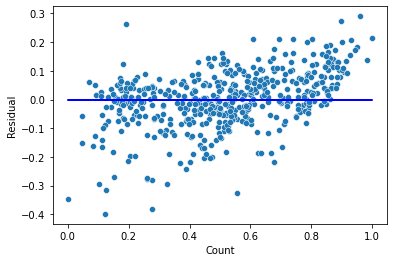

In [843]:
y_train_pred = lr7.predict(X_train_lm7)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-b')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

 There is no visible pattern in residual values, thus homoscedacity is described

From above VIF values we can see that all the predictor variables have VIF value less than 5. So we can consider that there is insignificant multicolinearity among the predictor variables.

## Making Predictions using final model
Scaling bike_test dataframe

In [844]:
n_var = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bike_test[n_var] = scaler.transform(bike_test[n_var])
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
22,0,0,0,0.046591,0.025950,0.453529,0.462217,0.110907,1,0,...,0,0,0,0,0,0,1,0,0,0
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,0,1,...,0,0,0,0,0,1,0,0,0,0
553,1,0,0,0.951196,0.933712,0.596104,0.212829,0.534975,0,0,...,0,0,0,0,0,0,1,0,0,0
504,1,0,0,0.699909,0.662746,0.551083,0.478229,0.817648,0,1,...,0,0,0,0,0,0,1,0,0,0
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,...,0,0,0,1,0,0,0,0,1,0


In [845]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.495455,0.040909,0.681818,0.550981,0.527344,0.662328,0.346015,0.519816,0.236364,0.268182,...,0.086364,0.081818,0.036364,0.322727,0.154545,0.127273,0.150000,0.172727,0.145455,0.118182
std,0.501120,0.198531,0.466833,0.228967,0.214959,0.143278,0.159517,0.219880,0.425817,0.444023,...,0.281541,0.274713,0.187620,0.468586,0.362295,0.334038,0.357886,0.378873,0.353363,0.323559
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.301299,0.073090,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.357562,0.352129,0.553355,0.232051,0.364818,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.557133,0.546299,0.661688,0.327568,0.525943,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.750530,0.707506,0.761905,0.435172,0.683128,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.010390,0.824380,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Dividing X_test and y_test

In [846]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [847]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns

X_test=X_test[col1]

# Adding constant variable to test dataframe
X_test_lm7 = sm.add_constant(X_test)

X_test_lm7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 22 to 483
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   const           220 non-null    float64
 1   yr              220 non-null    int64  
 2   temp            220 non-null    float64
 3   windspeed       220 non-null    float64
 4   Winter          220 non-null    uint8  
 5   Jul             220 non-null    uint8  
 6   Sep             220 non-null    uint8  
 7   Light_rainsnow  220 non-null    uint8  
 8   Misty           220 non-null    uint8  
 9   Saturday        220 non-null    uint8  
dtypes: float64(3), int64(1), uint8(6)
memory usage: 9.9 KB


In [848]:
# Making predictions using the final model (lr6)

y_pred = lr7.predict(X_test_lm7)

Text(0, 0.5, 'y_pred')

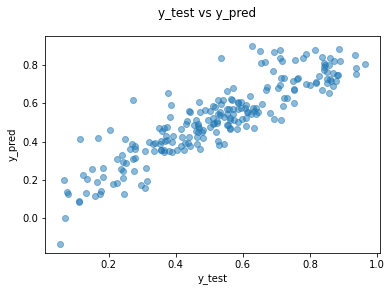

In [849]:
# plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred,alpha = 0.5)
fig.suptitle('y_test vs y_pred')             
plt.xlabel('y_test')                          
plt.ylabel('y_pred') 

## R2 Value Calculation for bike_test dataframe

In [850]:
r2 = round(r2_score(y_test, y_pred),3)
r2

0.793

## Adjusted R2 Value Calculation for bike_test dataframe

In [851]:
# n is number of rows in test dataset
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

#calculating Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),3)
adjusted_r2

0.784

-Train R^2= 0.805

-Train Adjusted R^2= 0.801

-Test R^2=0.793

-Test Adjusted R^2=0.784

### Calculating RMSE

In [852]:
RMSE = round(sqrt(mean_squared_error(y_test, y_pred)),4)
RMSE

0.0998

### Calculating Mean Absolute Error(MAE)

In [853]:
MAE = round(mean_absolute_error(y_test, y_pred),4)
MAE

0.0775

#### The Root Mean Squared Error value for the test dataset based on final model is 0.099 and Mean Absolute Error is 0.077, which indicates that the model is really good.

## The equation of best fitted line based on model lr7 is-
### cnt=0.1224 + (0.2288 *yr)  + (0.6165 *temp) − (0.1513 *windspeed) + (0.1009 *Winter) - (0.065 *Jul) + (0.0607 *Sep)+(0.0227 *Saturday) − (0.0693 *Misty) − (0.2941 *Light_rainsnow)

### Interpretation of coefficients of final model:

#### const : The Constant value of 0.1224 indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still increase by 0.1224 units

#### yr : A coefficient value of 0.2288 indicated that a unit increase in yr variable, increases the bike hire numbers by 0.2288 units

#### temp : A coefficient value of 0.6165 indicated that a unit increase in temp variable, increases the bike hire numbers by 0.6165 units

#### windspeed : A coefficient value of -0.1513 indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.1513 units

#### Winter : A coefficient value of 0.1009 indicated that a unit increase in W4_Winter variable increases the bike hire numbers by 0.1009 units

#### Sep : A coefficient value of 0.0607 indicated that a unit increase in Sep variable increases the bike hire numbers by 0.0607 units

#### Light_rainsnow : A coefficient value of -0.2941 indicated that, a unit increase in Weathersit3 variable, decreases the bike hire numbers by -0.2941 units

#### Misty : A coefficient value of -0.0693 indicated that a unit increase in Misty weather variable, decreases the bike hire numbers by 0.0693 units

#### Saturday : A coefficient value of 0.0227 indicated that a unit increase in Saturday variable increases the bike hire numbers by 0.0227 units

#### July: A coefficient value of -0.065 indicated that a unit increase in Saturday variable decreases the bike hire numbers by 0.065 units


## Results Based On Final Model 

### As per the final model, the top 5 predictor variables that influences bike booking are-
#### 1.Temp: A coefficient value of '0.6165 ' indicated that a temperature has significant impact on bike rentals.
#### 2.Light_rainsnow:  A coefficient value of '0.2941 ' indicated that a Light_rainsnow has significant impact on bike rentals.
#### 3.yr:  A coefficient value of '0.2288 ' indicated that a temperature has significant impact on bike rentals and year wise its increasing
#### 4.windspeed: A coefficient value of '0.1513 ' indicated that a windspeed has significant impact on bike rentals.
#### 5.Winter: A coefficient value of '0.1009 ' indicated that a Winter has significant impact on bike rentals.

### As per this final model It is recommended to give utmost importance to Temperature, Light_rainsnow and year variables while planning to achieve maximum bike rental booking.
### As high temperature and good weather positively impacts bike rentals, it is recommended that bike availability and promotions to be increased during summer months to further increase bike rentals.